## Ejercicio Final Módulo Análisis de Datos - Clasificación usando KNN
#### Por Harold Ricardo Restrepo Sepúlveda
#### Profesora Luz Stella Gómez



### Introducción

A continuación se hace el análisis de una base de datos en la que se presenta la calidad de unos vinos basado en algunas propiedades del vino.

El objetivo es generar un modelo que nos permita predecir la calidad de un vino basados en la base de datos en análisis.

La base de datos tiene los siguientes atributos en donde los primeros 11 atributos corresponden a las variables predictivas o independientes:
1. **fixed acidity**
2. **volatile acidity**
3. **citric acid**
4. **residual sugar**
5. **chlorides**
6. **free sulfur dioxide**
7. **total sulfur dioxide**
8. **density**
9. **pH**
10. **sulphates**
11. **alcohol**

La variable de salida o predictora:
12. **quality**

### Librerias 
A continuación se importan las librerias y módulos a utilizar en la elaboración y análisis del modelo:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os    
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from pandas_profiling import ProfileReport

### Carga de datos

Empezamos importando los datos disponibles y mirando las primeras y últimas filas. Los datos se importan desde un archivo plano en formato csv separado por comas:

In [20]:
os.chdir('C:/Users/Harold Ricardo/ModuloAnalisDeDatos/final_test/data') # Asignacion de ruta de trabajo
cwd=os.getcwd()                  # Asigna al a variable cwd el directorio de trabajo
df =pd.read_csv('Winequality.csv',header=0)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
print(df.shape)

(1599, 12)


La base de datos corresponde de 1599 filas que son los datos de entrada y 12 columnas que son los distintos atributos que tiene cada daos de entrada.

Los tipos de datos son:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

De estas dos revisiones previas se confirma que no hat datos faltantes. Porlo que las 1599 entradas estan completas.

Todos los datos son numéricos, por lo que no hay necesidad de utilizar variables dummy.

## Explorando los datos

Empezamos realizando un resumen estadístico descriptivo para todas las variables de la base de datos:

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Las calificaciones de calidad (Quality) dentro de la base de datos se van a tener entre 3 y 8. El promedio de las calificaciones esta en 5,63






### Revisión de duplicidad de datos
Verificamos si hay datos duplicados

In [142]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

Se encuentra que hay registros duplicados pero se decide no eliminarlos porque se puede dar el caso que dos muestras coincidan en sus características.

### Distribución de los datos
A continuación, demos un vistazo al conjunto de datos que se están examinando y cómo se distribuyen, para lo que inicialment revisamos en detalle el comportamiento de cada atributo:

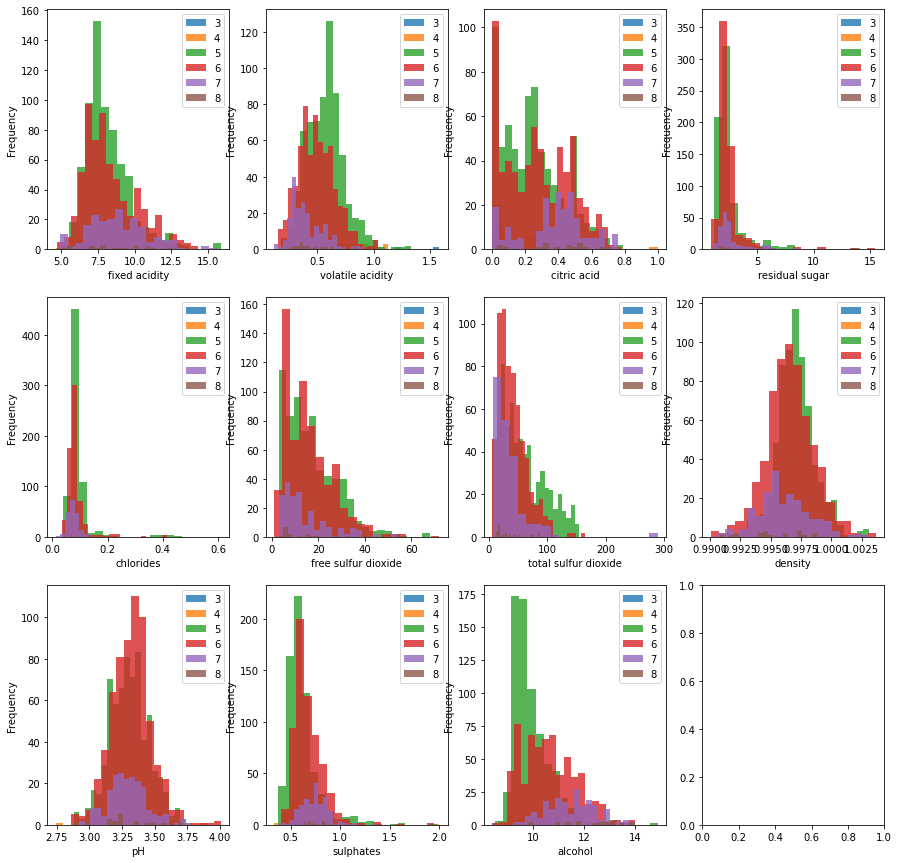

In [143]:
imbalanced=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
fig, axes=plt.subplots(ncols=4,nrows=3, figsize=(15,15))
for index, feature in enumerate(imbalanced):
    if index<4:
        i=0 
        j=index
    elif index<8:
        i=1 
        j=index-4
    elif index<12:
        i=2 
        j=index-8

    df.groupby('quality')[feature].plot(kind='hist', 
                                              bins=20, alpha=0.8, legend=True,
                                              ax=axes[i,j])
    axes[i,j].set_xlabel(feature);

En la gráfica anterior se pueden ver los histogramas de cada atributo. Dentro de ellos podemos ver que densidad y pH tienen una distribución parecida a la normal.

### Correlación
Ahora revisamos la correlación entre los distintos atributos:

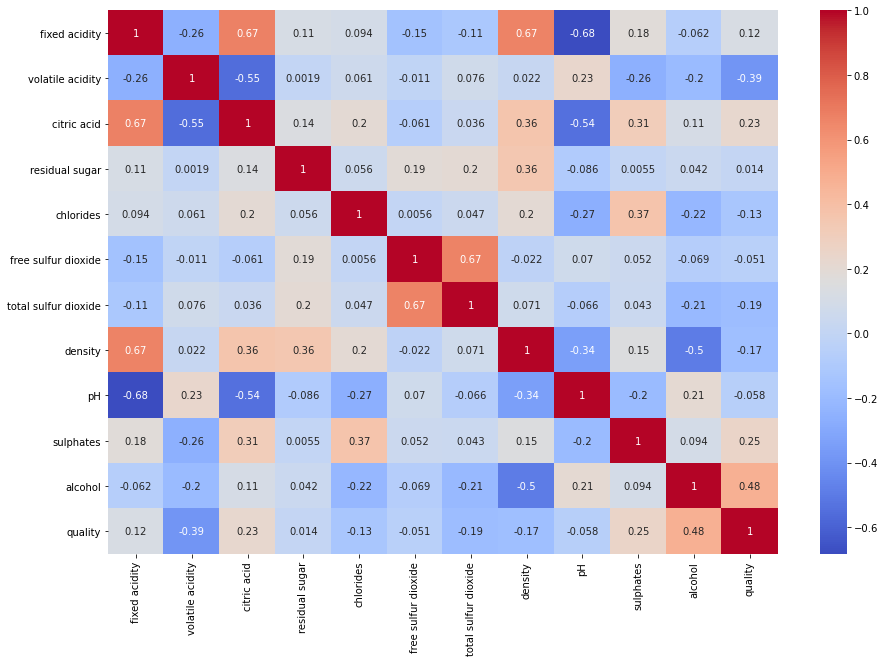

In [17]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

En primer lugar tenemos que los atributos con mayor correlación positiva son:

1. fixed acidity - citric acid con el 0.67 y fixed acidity - density con el 0.67
2. free sulfur dioxide - total sulfur dioxide con el 0.67
3. alcohol - quality con el 0.48

Ahora, los atributos con mayor correlación negativa son:
1. fixed acidity - pH con el -0.68
2. volatile acidity - citric acid con el -0.55
3. citric acid - pH con el -0.54

### Balanceo

Ahora se revisa como estan distribuidos los datos según la clasificación en quality:

In [26]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [25]:
df['quality'].value_counts(normalize=True)*100 

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

Gráficamente se pueden visualizar de la siguiente manera:

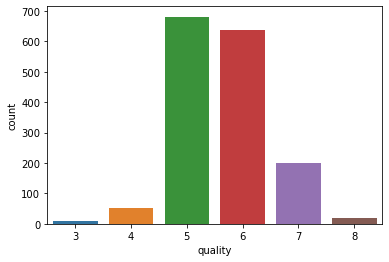

In [27]:
sns.countplot('quality', data = df)

Se ve que los datos estan desbalanceados estando concentrados en los valores de quality 5 y 6 en un 82,48%, en el valor de quaity igual a 7 en un 12,45% lo que nos da un 94,93% de los valores concentrados en estos 3 valores de quality. Podemos decir que los datos tiene un alto sesgo hacia estos valores.

A nivel de ejemplo, se visualiza en las siguientes gráficos como se distribuyen por grupos los datos comparados contra la variable de salida "quality":

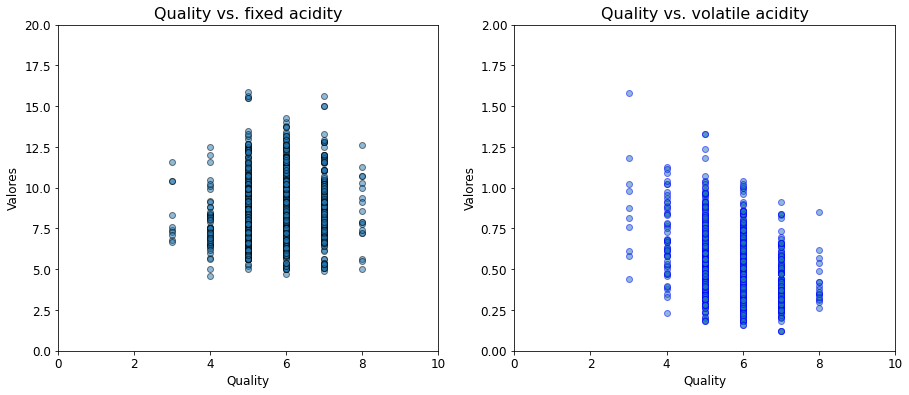

In [146]:
# Quality vs. fixed acidity
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(df['quality'], df['fixed acidity'], edgecolor='k', alpha=0.5)
plt.ylim(0, 20)
plt.yticks(fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 10)
plt.xlabel('Quality', fontsize=12)
plt.title('Quality vs. fixed acidity', fontsize=16)

# Quality vs. volatile acidity
plt.subplot(122)
plt.scatter(df['quality'], df['volatile acidity'], edgecolor='b', alpha=0.5)
plt.xlim(0, 10)
plt.xlabel('Quality', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 2)
plt.ylabel('Valores', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Quality vs. volatile acidity', fontsize=16)
plt.show()

En las visualizaciones anteriores vemos que los datos se concentran principalmente en los valores de quaility 5, 6 y 7. Solo se ha hecho la exploración para 2 atributos de esa manera. Para extenderlo a los demas atributos, lo podemos hacer utilizando modelos de agrupación los cuales nos permiten resumir y detectar relaciones potencialmente interesantes con bastante
rapidez. 

En este caso, se va a utilizar en método K-NN. Antes de usar este método es necesario hacer un preprocesamiento de los datos además de hacer un balanceo de los mismos.


### Dividir en grupo de entrenamiento y de prueba los datos

#### Vector de variables predictivas

In [147]:
X = df.loc[:,df.columns != 'quality']

#### Variable de repuesta

In [148]:
y = df.loc[:,df.columns == 'quality']

In [117]:
# Define features X
X = np.asarray(df.iloc[:,:-1])
# Define target y
y = np.asarray(df['quality'])

### División de los datos en conjuntos de entrenamiento y de prueba

Ahora se necesita hacer el balanceo de los datos, para lo cual uilizamos la siguiente libreria:

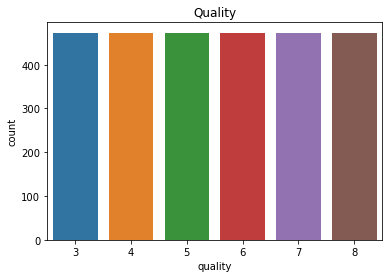

In [151]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

smt = SMOTE(random_state=0)
data_X,data_y=smt.fit_sample(X_train, y_train)

sns.countplot(x='quality',data=data_y)
plt.title('Quality')
plt.show()


Ya quedaron balanceados los datos, ahora procedemos a hacer la implementación de ML con el método KNN.

Los datos quedaron distribuidos en dos conjuntos:

In [153]:
print ('Conjunto de entrenamiento:', X_train.shape, y_train.shape)
print ('Conjunto de prueba:', X_test.shape, y_test.shape)

Conjunto de entrenamiento: (1119, 11) (1119, 1)
Conjunto de prueba: (480, 11) (480, 1)


### Modelo K-Nearest Neighbors

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Text(0, 0.5, 'Cross-validated accuracy')

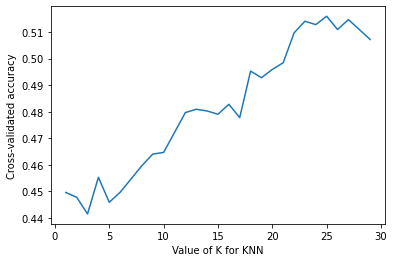

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 30
k_range = range(1, 30)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
# It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
# %matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')


De la gráfica anterior vemos que el valor máximo se tiene alrededor de k=22, como lo recomendable es tener un número impar entomces voy a usar k=21

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.56      0.71      0.63       208
           6       0.56      0.54      0.55       204
           7       0.40      0.18      0.25        45
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.25      0.24      0.24       480
weighted avg       0.52      0.55      0.53       480



C:\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
# Train the model and predict for k=19
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Reporte de clasificación para el test set
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

accuracy = cross_val_score(knn, X, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())

accuracy = cross_val_score(knn, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())

print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovr'))

<ipython-input-156-1440d9edd074>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           3      1.000     0.000     0.000         3
           4      1.000     0.000     0.000        15
           5      0.563     0.707     0.627       208
           6      0.558     0.544     0.551       204
           7      0.400     0.178     0.246        45
           8      1.000     0.000     0.000         5

    accuracy                          0.554       480
   macro avg      0.754     0.238     0.237       480
weighted avg      0.567     0.554     0.529       480



C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

cross validation score 0.4984237421383648


C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

cross validation score with roc_auc 0.6055158197744224
roc_auc_score 0.6380976025131807


C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Según los resultados obtenidos en recall en los cuales si es mayor a 0.5 se tiene una adecuada predicción, vemos que el modelo predice bien los quality 5 y 6, y el quality 7 no es representativa la predicción.

### Confusion Matrix

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0   0   2   1   0   0]
 [  0   0  12   2   1   0]
 [  0   0 147  59   2   0]
 [  0   0  86 111   7   0]
 [  0   0  13  24   8   0]
 [  0   0   1   2   2   0]]


De la confussion matrix podemos ver que en la diagonal se encuentran los resultados de las clasificaciones que fueron realizadas de manera correcta y podemos tener los sigueintes resultados para cada valor de quality:
1. **Quality = 3.** No se hicieron predicciones correctas
2. **Quality = 4.** No se hicieron predicciones correctas
3. **Quality = 5.** Se tienen 147 predicciones correctas, lo que equivale al 70,67% de los valores clasificados para este quality.
4. **Quality = 6.** Se tienen 111 predicciones correctas, lo que equivale al 54,41% de los valores clasificados para este quality.
5. **Quality = 7.** Se tienen 8 predicciones correctas que equivalen al 17,78% de los valores clasificados para este quality. Es decir no se hace una clasificación precisa.
6. **Quality = 8.** No se hicieron predicciones correctas

## Prueba

In [162]:
X_test2 =X_test[0:1]

In [165]:
y_pred = knn.predict(X_test2)
print(y_pred)

[5]


# Conclusión

Despues de aplicar el método KNN a la base de datos de vinos, se tiene que solo esta prediciendo los valores de quility 5 y 6. Sobre todo el valor 6 no es tan alto el nivel de certeza.  Por lo tanto este método no parece ser el adecuado para analizar esta base de datos.